In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import describe

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

import sys
sys.path.append('../Data/fashion-mnist/utils')
import mnist_reader

from sklearn.datasets import fetch_mldata
from sklearn.cluster import AgglomerativeClustering, DBSCAN

mnist = fetch_mldata('MNIST original', data_home='../Data')

from scipy.cluster.hierarchy import *


In [31]:
G = lambda cm: [
    1 - np.sum(
        [(np.square(
            cm[i, j] / (np.sum(cm[:, j]) if np.sum(cm[:, j]) > 0 else 1))
         ) for i in range(cm.shape[0])]
    ) for j in range(cm.shape[1])]
gini = lambda cm: np.sum(np.multiply(G(cm), np.sum(cm, axis=0))) / np.sum(cm)
purity = lambda cm, tar: np.sum(np.amax(cm, axis=0)) / tar.shape[0]

def params(clusters, targets):
    cm = confusion_matrix(targets, clusters)
    pur = purity(cm, targets)
#     gin = gini(cm)
    print("Purity: ", pur)
#     print("Gini index: ", gin)
    return pur#, gin

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
D = euclidean_distances(mnist.data)

In [7]:
D.shape

(70000, 70000)

In [8]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
_D = ssd.squareform(D)

In [9]:
_D.shape

(2449965000,)

In [10]:
Zavg = linkage(_D, method='average')

In [11]:
Zsingle = single(_D)

In [128]:
threshold = 0.7

In [129]:
Tavg = fcluster(Zavg, threshold)
params(Tavg, mnist.target)
np.unique(Tavg, return_counts=True)

Purity:  0.992028571429


0.99202857142857148

(array([    1,     2,     3, ..., 45269, 45270, 45271], dtype=int32),
 array([2, 2, 2, ..., 1, 1, 1]))

In [75]:
Tsingle = fcluster(Zsingle, threshold)
params(Tsingle, mnist.target)
np.unique(Tsingle, return_counts=True)

Purity:  0.997385714286


0.99738571428571432

(array([    1,     2,     3, ..., 39211, 39212, 39213], dtype=int32),
 array([2, 2, 2, ..., 1, 1, 1]))

(array([  314.,   509.,    27.,   303.,  4630.,    43.,    75.,   198.,
          449.,   277.]),
 array([  3.00000000e+00,   4.51300000e+03,   9.02300000e+03,
          1.35330000e+04,   1.80430000e+04,   2.25530000e+04,
          2.70630000e+04,   3.15730000e+04,   3.60830000e+04,
          4.05930000e+04,   4.51030000e+04]),
 <a list of 10 Patch objects>)

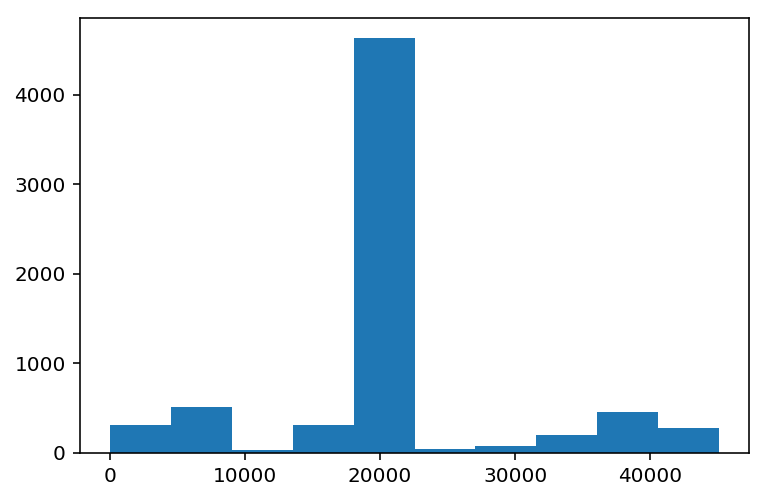

In [145]:
plt.hist(Tavg[np.where(mnist.target == 8)])
plt.show()

In [124]:
ths = np.arange(0, 1.1, 0.01)
prs = list()
nclst = list()
for th in ths:
    _Tavg = fcluster(Zavg, th)
    _p = params(_Tavg, mnist.target)
    prs.append(_p)
    nclst.append(len(np.unique(_Tavg)))

print(nclst)
print(prs)

Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.992085714286
Purity:  0.99208

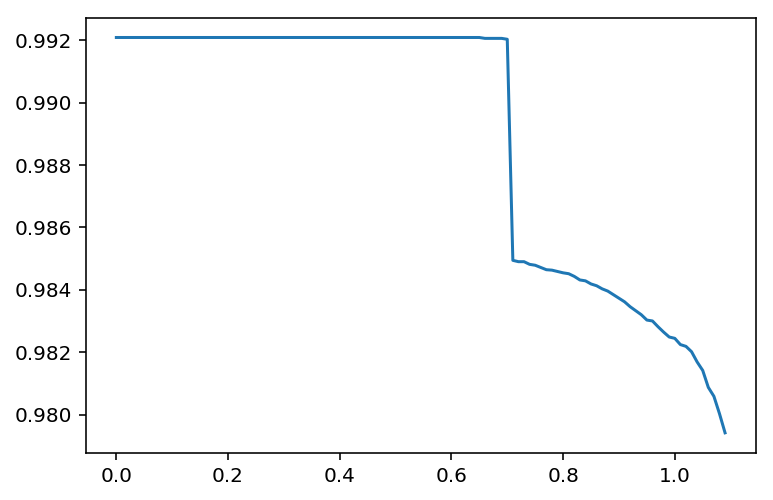

In [126]:
plt.plot(ths, prs)

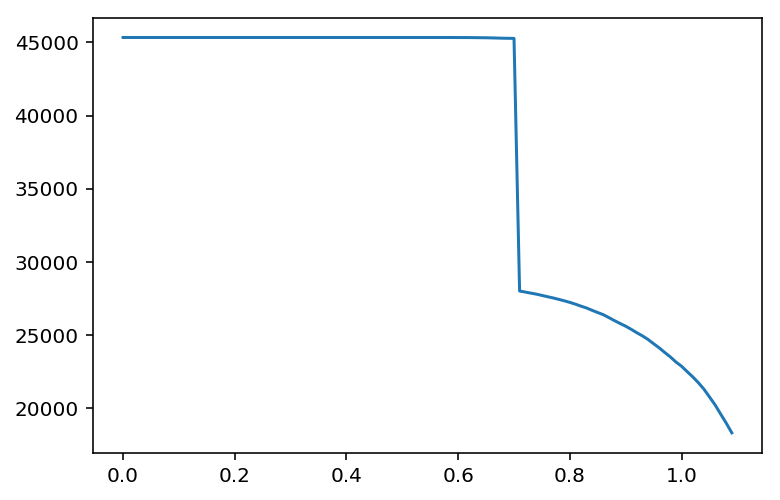

In [127]:
plt.plot(ths, nclst)

In [ ]:
# nclst = [45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45333, 45332, 45329, 45328, 45327, 45323, 45318, 45314, 45304, 45295, 45283, 45278, 45271, 28009, 27938, 27865, 27796, 27708, 27620, 27536, 27439, 27339, 27232, 27109, 26973, 26848, 26686, 26536, 26388, 26188, 25983, 25789, 25603, 25389, 25157, 24942, 24698, 24407, 24123, 23806, 23502, 23157, 22868, 22503, 22143, 21749, 21305, 20771, 20232, 19601, 18983, 18318]
# prs = [0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99208571428571424, 0.99205714285714286, 0.99205714285714286, 0.99205714285714286, 0.99205714285714286, 0.99202857142857148, 0.98494285714285712, 0.9849, 0.9849, 0.98481428571428575, 0.98478571428571426, 0.98471428571428576, 0.98464285714285715, 0.98462857142857141, 0.98458571428571429, 0.98454285714285716, 0.98451428571428568, 0.98442857142857143, 0.9843142857142857, 0.98428571428571432, 0.98418571428571433, 0.98412857142857146, 0.98402857142857147, 0.98395714285714286, 0.98384285714285713, 0.9837285714285714, 0.98361428571428566, 0.98345714285714281, 0.98332857142857144, 0.98319999999999996, 0.98302857142857147, 0.98299999999999998, 0.98281428571428575, 0.98264285714285715, 0.9824857142857143, 0.98244285714285717, 0.9822428571428572, 0.98218571428571433, 0.98201428571428573, 0.98168571428571427, 0.98141428571428568, 0.98087142857142862, 0.98058571428571428, 0.98002857142857147, 0.97941428571428568]
